# Import our Libraries
- I've included a list libraries that i have used in the past and have found to be useful, not all of them are needed and can easily be tailored to your needs

In [73]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import psycopg2
import collections
import asyncio
import getpass
import re
from datetime import datetime as dt
import os,sys,re
import urllib3
import prettytable
from collections import Counter
import seaborn as sns
import random
import sklearn
from datetime import timedelta

from sklearn.externals.joblib import Memory
memory = Memory(cachedir='/tmp', verbose=0)
#@memory.cache above any def fxn.

%matplotlib inline
plt.style.use('ggplot')

from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 44.7 ms


# import our data
- the data is located on the github page: _____(link here)

In [18]:
#neiss = pd.read_csv('/Users/geickelb1/Documents/GitHub/hsip441_neiss_python/data/raw/neiss2016.csv') #file location of neiss2016 data csv
neiss= pd.read_csv('/Users/geickelb1/Documents/GitHub/hsip441_neiss_python/data/raw/injuries.csv') #annotated neiss file, use this
print(injuries.shape)
neiss.head()

(375197, 20)


,NEK,Trmt_date,Age,Sex,Race,Raceoth,Bdpt,Diag,Diagoth,Disp,Loc,Fmv,Prod1,Prod2,Narr1,Narr2,Stratum,PSU,Wt,narrative
0,160101845,01/01/2016,92.0,MALE,N.S.,NaN,79 - LOWER TRUNK,57 - FRACTURE,NaN,4 - TREATED AND ADMITTED/HOSPITALIZED,HOME,NO/?,1645 - DAY WEAR,1807 - FLOORS OR FLOORING MATERIALS,92YOM TRYINGO TO TAKE OFF PANTS AND LOST BALAN...,HIP FRACTURE,M,63,103.2251,92YOM TRYINGO TO TAKE OFF PANTS AND LOST BALAN...
1,160101847,01/01/2016,90.0,MALE,N.S.,NaN,79 - LOWER TRUNK,57 - FRACTURE,NaN,4 - TREATED AND ADMITTED/HOSPITALIZED,HOME,NO/?,670 - RECLINER CHAIR,0,90YOM FELL GETTING OUT OF A RECLINER CHAIR AND...,NaN,M,63,103.2251,90YOM FELL GETTING OUT OF A RECLINER CHAIR AND...
2,160101848,01/01/2016,71.0,FEMALE,N.S.,NaN,79 - LOWER TRUNK,57 - FRACTURE,NaN,4 - TREATED AND ADMITTED/HOSPITALIZED,HOME,NO/?,1807 - FLOORS OR FLOORING MATERIALS,0,71YOF SLIPPED AND FELL TO HER WET KITCHEN FLOO...,NaN,M,63,103.2251,71YOF SLIPPED AND FELL TO HER WET KITCHEN FLOO...
3,160101852,01/01/2016,71.0,FEMALE,N.S.,NaN,31 - UPPER TRUNK,"64 - STRAIN, SPRAIN",NaN,1 - TREATED/EXAMINED AND RELEASED,UNK,NO/?,"1144 - BAGS, NOT ELSEWHERE CLASSIFIED",0,71YOF CARRYING A 50 POUND BAG AND STRAINED CHE...,NaN,M,63,103.2251,71YOF CARRYING A 50 POUND BAG AND STRAINED CHE...
4,160101857,01/01/2016,57.0,MALE,N.S.,NaN,83 - FOOT,59 - LACERATION,NaN,1 - TREATED/EXAMINED AND RELEASED,HOME,NO/?,"464 - KNIVES, NOT ELSEWHERE CLASSIFIED",0,57YOM DROPPED A KNIFE ONTO LEFT FOOT LACERATIO...,NaN,M,63,103.2251,57YOM DROPPED A KNIFE ONTO LEFT FOOT LACERATIO...


time: 2.5 s


# Explore our data

In [19]:
neiss.describe(include ='all', ).T #gives some summary statistics on each of our columns. note the NaN's for data not recognized as numeric

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
NEK,375197,NaN,NaN,NaN,1.61038e+08,1.74826e+06,1.60102e+08,1.60441e+08,1.6074e+08,1.61025e+08,1.70339e+08
Trmt_date,375197,366,08/27/2016,1282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,375197,NaN,NaN,NaN,31.3304,26.3129,0,10,23,51,110
Sex,375197,3,MALE,203481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,375197,7,WHITE,148747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Raceoth,24037,102,HISPANIC,18063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bdpt,375197,26,75 - HEAD,61873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diag,375197,30,59 - LACERATION,65413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diagoth,56258,5025,PAIN,18971,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Disp,375197,7,1 - TREATED/EXAMINED AND RELEASED,336944,NaN,NaN,NaN,NaN,NaN,NaN,NaN


time: 1.94 s


In [22]:
neiss.nunique()

NEK          375197
Trmt_date       366
Age             131
Sex               3
Race              7
Raceoth         102
Bdpt             26
Diag             30
Diagoth        5025
Disp              7
Loc               9
Fmv               4
Prod1           757
Prod2           652
Narr1        373351
Narr2        168455
Stratum           5
PSU              84
Wt               16
narrative    373538
dtype: int64

time: 1.09 s


## grouping
- groupby function is fantastic for this!
- syntax1: df.groupby('col_to_group_by')['col_to_apply_method'].method()
- syntax2: df.groupby('col_to_group_by')['col_to_apply_function'].transform(lambda x: fxn(x))

In [24]:
neiss.groupby("Bdpt")['Prod1'].value_counts() #returns the breakdown of products for each unique bodypart

Bdpt          Prod1                                                          
0 - INTERNAL  1686 - COINS                                                       1233
              1616 - JEWELRY                                                      364
              884 - BATTERIES                                                     326
              1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS                    144
              1345 - BUILDING SETS                                                118
              1395 - TOYS, NOT SPECIFIED                                          106
              428 - KITCHEN GADGETS, NOT ELSEWHERE CLASSIFIED                      73
              1137 - PAPER PRODUCTS                                                69
              1354 - MARBLES                                                       65
              1682 - HAIR CURLERS, CURLING IRONS, CLIPS & HAIRPINS                 61
              1650 - DESK SUPPLIES                            

time: 134 ms


# data slicing
- .loc
- syntax: df.loc['row_name', 'col_name']

In [35]:
neiss.loc[:,'Prod1'].head()

0                           1645 - DAY WEAR
1                      670 - RECLINER CHAIR
2       1807 - FLOORS OR FLOORING MATERIALS
3     1144 - BAGS, NOT ELSEWHERE CLASSIFIED
4    464 - KNIVES, NOT ELSEWHERE CLASSIFIED
Name: Prod1, dtype: object

time: 3.23 ms


In [39]:
#using conditional logic to get a boolean series
(neiss.loc[:,'Prod1'] == '1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS').head()


0    False
1    False
2    False
3    False
4    False
Name: Prod1, dtype: bool

time: 27.8 ms


In [40]:
#using fancy indexing to slice dataframes:
#enter a boolean series into a .loc to return only the rows that are True
neiss_bool= neiss.loc[:,'Prod1']=='1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS'
neiss.loc[neiss_bool].head() #first ten rows of the neiss dataframe where Product1 is equal to '1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS'


,NEK,Trmt_date,Age,Sex,Race,Raceoth,Bdpt,Diag,Diagoth,Disp,Loc,Fmv,Prod1,Prod2,Narr1,Narr2,Stratum,PSU,Wt,narrative
41,160101921,01/01/2016,2.00,FEMALE,N.S.,NaN,83 - FOOT,63 - PUNCTURE,NaN,1 - TREATED/EXAMINED AND RELEASED,UNK,NO/?,"1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS",0,2YOF STEPPED ON A NAIL AND SUSTAINED A PW TO FOOT,NaN,S,73,87.7206,2YOF STEPPED ON A NAIL AND SUSTAINED A PW TO FOOT
199,160103679,01/01/2016,6.00,MALE,OTHER,HISPANIC,75 - HEAD,59 - LACERATION,NaN,1 - TREATED/EXAMINED AND RELEASED,HOME,NO/?,"1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS",0,"6 YOM INJURED SCALP,CUT HEAD ON NAIL AT HOME. ...",NaN,M,78,103.2251,"6 YOM INJURED SCALP,CUT HEAD ON NAIL AT HOME. ..."
277,160104712,01/03/2016,19.00,MALE,N.S.,NaN,83 - FOOT,63 - PUNCTURE,NaN,1 - TREATED/EXAMINED AND RELEASED,UNK,NO/?,"1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS",0,19YOM STEPPED ON A NAIL AND SUSTAINED A PW TO ...,NaN,V,2,16.1154,19YOM STEPPED ON A NAIL AND SUSTAINED A PW TO ...
413,160106848,01/01/2016,6.00,FEMALE,N.S.,NaN,83 - FOOT,63 - PUNCTURE,NaN,1 - TREATED/EXAMINED AND RELEASED,HOME,NO/?,"1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS",0,6YOF PUNCT FOOT ON NAIL,NaN,V,17,16.1154,6YOF PUNCT FOOT ON NAIL
564,160107225,01/01/2016,1.08,FEMALE,BLACK/AFRICAN AMERICAN,NaN,88 - MOUTH,56 - FOREIGN BODY,NaN,1 - TREATED/EXAMINED AND RELEASED,HOME,NO/?,"1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS",1807 - FLOORS OR FLOORING MATERIALS,13 MOF PLAYING ON FLOOR WITH OLDER SISTER WHO ...,"R MOUTH, UNKNOWN IF INGESTED, DX: FOREIGN BODY...",V,61,16.1154,13 MOF PLAYING ON FLOOR WITH OLDER SISTER WHO ...


time: 54.9 ms


## advanced data slicing: combining .loc and groupby to do cool things
- syntax: df.loc[{boolean_series}].groupby('col_to_group_by')['col_to_apply_method'].method()

In [197]:
(
neiss.loc[
    neiss.loc[:,'Prod1']=='1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS'
].groupby("Diag")['Prod1'].value_counts()
)
#how to think about this:
#first returns every row of the neiss dataframe where Product1 is equal to '1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS'
#then it groups this sliced dataframe by diagnosis and returns the count of all diagnoses for each unique value in the Prod1 column (which was previously filtered).



Diag                   Prod1                                           
41 - INGESTION         1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS     135
42 - ASPIRATION        1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS       9
53 - CONTUSIONS, ABR.  1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS      88
56 - FOREIGN BODY      1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS     135
57 - FRACTURE          1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS      16
58 - HEMATOMA          1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS       5
59 - LACERATION        1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS     367
61 - NERVE DAMAGE      1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS       2
62 - INTERNAL INJURY   1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS      10
63 - PUNCTURE          1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS    1444
64 - STRAIN, SPRAIN    1819 - NAILS, SCREWS, CARPET TACKS OR THUMBTACKS      13
66 - HEMORRHAGE        1819 - NAILS, SCREWS, CAR

time: 43.9 ms


# visualizing data

### matplotlib general workflow:
- prepare the data
- create plot
- plotting routines
- customize plot

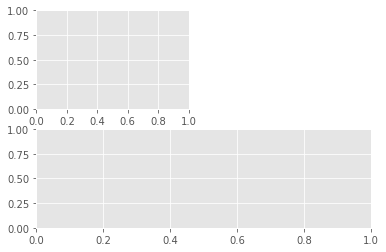

<Figure size 288x576 with 0 Axes>

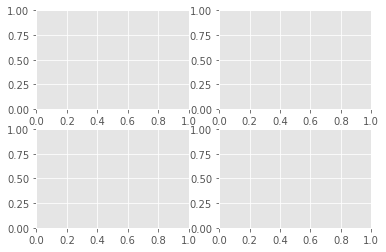

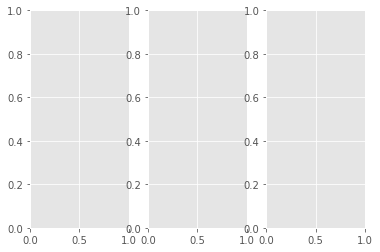

time: 676 ms


In [7]:
#matplotlib subplot example:

#create plot
fig = plt.figure() #example 1
fig2 = plt.figure(figsize=plt.figaspect(2.0)) #example 2

## all plotting is done w/ respect to an Axes. in most cases, a subplot will fit your needs. a subplot is an axes on a grid system.
fig.add_axes()
ax1= fig.add_subplot(221) #row-col-num
ax3= fig.add_subplot(212)
fig3, axes = plt.subplots(nrows=2,ncols=2) #example 3
fig4, axes2 = plt.subplots(ncols=3) #example 4

[Text(0,0.5,'Count'),
 Text(0.5,0,'Age'),
 Text(0.5,1,'Neiss 2016 incidents by age')]

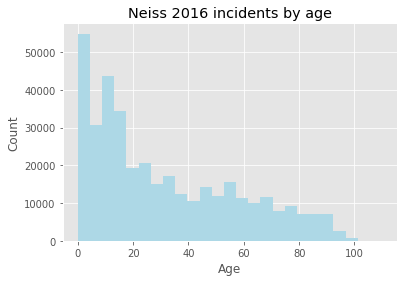

time: 165 ms


In [25]:
#plotting 2 ways: Matplotlib
#step2: create plot

%matplotlib inline 
#a jupyter notebook command for inline plotting

fig = plt.figure()
ax = fig.add_subplot(111)
#step3/4 plot / customize plot
ax.hist(neiss['Age'], #data series
        bins=25, # number of bins
        color='lightblue', #color of chart
        linewidth=3) #width of lines
ax.set(title='Neiss 2016 incidents by age',
      ylabel='Count',
      xlabel='Age')


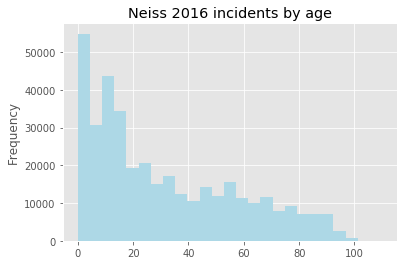

time: 201 ms


In [26]:
#plotting 2 ways: pyplot
## quicker and easier, but with a lot less control, espescially once your plots get more complex
neiss['Age'].plot.hist(bins=25,
    color = 'lightblue',
    title = 'Neiss 2016 incidents by age'
)

## plotting the results of the advanced dataslicing

''

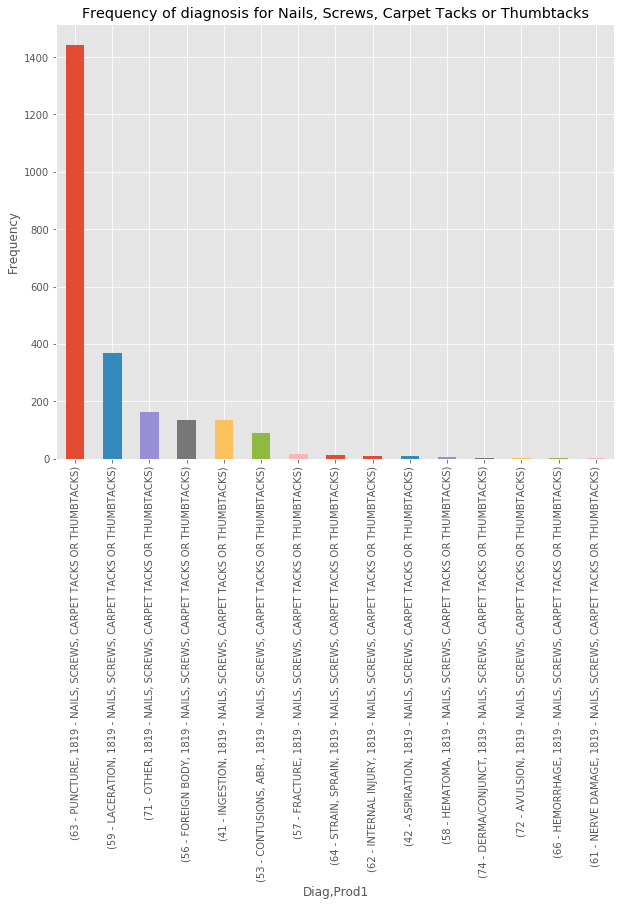

time: 476 ms


In [70]:
%matplotlib inline
neiss.groupby("Bdpt")['Prod1'].value_counts()
fig, ax = plt.subplots(figsize = (10, 8))
dx = neiss.loc[neiss_bool].groupby("Diag")['Prod1'].value_counts().sort_values(ascending=False)
dx.plot.bar(ax = ax,
            title = ' Countries with most wine representations',
           )
ax.set(title='Frequency of diagnosis for Nails, Screws, Carpet Tacks or Thumbtacks',
      ylabel='Frequency',
      xlabel='Diag,Prod1')
;

# redoing my home chemical burn time series

In [80]:
#finding column names
list(neiss)

['NEK',
 'Trmt_date',
 'Age',
 'Sex',
 'Race',
 'Raceoth',
 'Bdpt',
 'Diag',
 'Diagoth',
 'Disp',
 'Loc',
 'Fmv',
 'Prod1',
 'Prod2',
 'Narr1',
 'Narr2',
 'Stratum',
 'PSU',
 'Wt',
 'narrative']

time: 2.35 ms


In [81]:
#looking at unique diagnosis values:
neiss['Diag'].unique()

array(['57 - FRACTURE', '64 - STRAIN, SPRAIN', '59 - LACERATION',
       '53 - CONTUSIONS, ABR.', '72 - AVULSION', '62 - INTERNAL INJURY',
       '71 - OTHER', '49 - BURN, CHEMICAL', '51 - BURNS, THERMAL',
       '63 - PUNCTURE', '68 - POISONING', '56 - FOREIGN BODY',
       '55 - DISLOCATION', '48 - BURN, SCALD', '41 - INGESTION',
       '74 - DERMA/CONJUNCT', '65 - ANOXIA', '54 - CRUSHING',
       '61 - NERVE DAMAGE', '52 - CONCUSSION', '58 - HEMATOMA',
       '42 - ASPIRATION', '60 - DENTAL INJURY', '50 - AMPUTATION',
       '46 - BURN, ELECTRICAL', '67 - ELECTRIC SHOCK', '66 - HEMORRHAGE',
       '69 - SUBMERSION', '73 - RADIATION', '47 - BURN, NOT SPEC.'],
      dtype=object)

time: 17.4 ms


In [82]:
#slicing neiss dataframe for all rows where diagnosis is a chemical burn
chem_burns= neiss.loc[neiss.loc[:,'Diag']=='49 - BURN, CHEMICAL',:]
chem_burns.head()

,NEK,Trmt_date,Age,Sex,Race,Raceoth,Bdpt,Diag,Diagoth,Disp,Loc,Fmv,Prod1,Prod2,Narr1,Narr2,Stratum,PSU,Wt,narrative
20,160101896,01/01/2016,31.0,MALE,N.S.,NaN,77 - EYEBALL,"49 - BURN, CHEMICAL",NaN,1 - TREATED/EXAMINED AND RELEASED,HOME,NO/?,955 - AUTOMOTIVE CHEMICALS,0,31YOM WORKING UNDER HIS CAR AT HOME WHEN POWER...,NTO EYE CHEMICAL BURN TO EYE,M,63,103.2251,31YOM WORKING UNDER HIS CAR AT HOME WHEN POWER...
1398,160112643,01/04/2016,37.0,FEMALE,N.S.,NaN,75 - HEAD,"49 - BURN, CHEMICAL",NaN,1 - TREATED/EXAMINED AND RELEASED,HOME,NO/?,"921 - CHEMICALS, NOT ELSEWHERE CLASSIFIED",0,37 YOF WITH CHEMICAL BURN TO SCALP FROM HAIR S...,DX CHEMICAL BURN,V,58,16.1154,37 YOF WITH CHEMICAL BURN TO SCALP FROM HAIR S...
6269,160128219,01/11/2016,47.0,MALE,N.S.,NaN,79 - LOWER TRUNK,"49 - BURN, CHEMICAL",NaN,1 - TREATED/EXAMINED AND RELEASED,PUBLIC,NO/?,954 - GENERAL PURPOSE HOUSEHOLD CLEANERS,649 - TOILETS,47YM STS SPRAYED CLEANING SPRAY ON THE TOILET ...,BURN TO THE BUTTOCKS>>CHEM BURN,V,21,16.1154,47YM STS SPRAYED CLEANING SPRAY ON THE TOILET ...
8426,160133577,01/13/2016,2.0,MALE,WHITE,NaN,81 - UPPER LEG,"49 - BURN, CHEMICAL",NaN,1 - TREATED/EXAMINED AND RELEASED,HOME,NO/?,"921 - CHEMICALS, NOT ELSEWHERE CLASSIFIED",1644 - NIGHTWEAR,2 YO M PT WAS PULLING DOWN HIS PAJAMAS OFF WAS...,"PILLED ON HIS THIGHS,CRYING,REDNESS. DX CHEMIC...",L,89,72.8490,2 YO M PT WAS PULLING DOWN HIS PAJAMAS OFF WAS...
9189,160135581,01/17/2016,67.0,FEMALE,N.S.,NaN,77 - EYEBALL,"49 - BURN, CHEMICAL",NaN,1 - TREATED/EXAMINED AND RELEASED,HOME,NO/?,956 - BLEACHES (NONCOSMETIC),0,67 YR OLD FEMALE CLEANING AND SPLASHED *** BLE...,URN,V,38,16.1154,67 YR OLD FEMALE CLEANING AND SPLASHED *** BLE...


time: 45.7 ms


In [85]:
#investigating variables associated with chemical burns
chem_burns['Loc'].value_counts() 


HOME      265
UNK       136
PUBLIC     12
SCHOOL      9
STREET      3
FARM        1
SPORTS      1
Name: Loc, dtype: int64

time: 4.27 ms


In [95]:
#my simple classifier: chemical burns that occur in the home.
chem_burns= neiss.loc[neiss.loc[:,'Diag']=='49 - BURN, CHEMICAL',:]
chem_burns_home= chem_burns.loc[chem_burns.loc[:,'Loc']=='HOME',:]

#alternatively:
chem_burns_home2= neiss[(neiss['Diag']=='49 - BURN, CHEMICAL') & (neiss['Loc'] == "HOME")]

#quick check to ensure both dataslicings return same final dataframe
print(chem_burns_home.shape, chem_burns_home2.shape) #shapes are equal

(265, 20) (265, 20)
time: 82.3 ms


### timeseries:

In [157]:
#ensure my dates are handeled as pandas datetime objects
chem_burns_home2['Trmt_date']= pd.to_datetime(chem_burns_home2['Trmt_date'].sort_values(), '%Y-%m')
chem_burns_home2['Trmt_date'].head()

/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


20     2016-01-01
1398   2016-01-04
8426   2016-01-13
9189   2016-01-17
9990   2016-01-18
Name: Trmt_date, dtype: datetime64[ns]

time: 127 ms


In [167]:
#i want to plot Trmt_date vs count for my time series, so my dataframe will need to have 1 row for each Trmt_date
print(chem_burns_home2['Trmt_date'].nunique())
#i have 192 unique days and 265 rows, so i need to make a new dataframe with the counts.

#making a dataframe with treatment date and count at each date where rownames are the treatment date
chem_burns_home_ts = chem_burns_home2['Trmt_date'].value_counts()
chem_burns_home_ts = chem_burns_home_ts.sort_index() # reordering the rows so they are ascending again
chem_burns_home_ts.head()
#if my rownames were not my treatment date i set index (rownames) to be my treatment dates:
#chem_burns_home2= chem_burns_home2.set_index('Trmt_date')

192


2016-01-01    1
2016-01-04    1
2016-01-05    1
2016-01-10    1
2016-01-13    1
Name: Trmt_date, dtype: int64

time: 18.4 ms


In [168]:
#checking my indexes are in datetime64[ns] format
chem_burns_home_ts.index

DatetimeIndex(['2016-01-01', '2016-01-04', '2016-01-05', '2016-01-10',
               '2016-01-13', '2016-01-17', '2016-01-18', '2016-01-21',
               '2016-01-24', '2016-01-25',
               ...
               '2016-12-05', '2016-12-07', '2016-12-08', '2016-12-10',
               '2016-12-13', '2016-12-14', '2016-12-15', '2016-12-18',
               '2016-12-19', '2016-12-31'],
              dtype='datetime64[ns]', length=192, freq=None)

time: 2.96 ms


In [171]:
#can specify range:
print(chem_burns_home_ts.index.max(), chem_burns_home_ts.index.min())
print(chem_burns_home_ts['2016-01-01':'2016-03-01'])

2016-12-31 00:00:00 2016-01-01 00:00:00
2016-01-01    1
2016-01-04    1
2016-01-05    1
2016-01-10    1
2016-01-13    1
2016-01-17    1
2016-01-18    1
2016-01-21    1
2016-01-24    1
2016-01-25    2
2016-01-26    3
2016-01-27    1
2016-01-28    1
2016-02-04    1
2016-02-09    2
2016-02-11    1
2016-02-13    1
2016-02-16    2
2016-02-17    2
2016-02-20    1
2016-02-23    3
2016-02-24    2
2016-02-28    1
Name: Trmt_date, dtype: int64
time: 4.14 ms


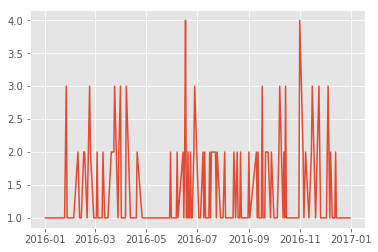

time: 139 ms


In [173]:
plt.plot(chem_burns_home_ts)

In [178]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

time: 21.6 ms


/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


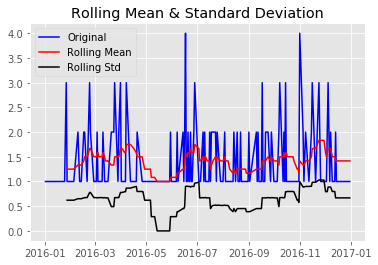

Results of Dickey-Fuller Test:
Test Statistic                -1.390124e+01
p-value                        5.729272e-26
#Lags Used                     0.000000e+00
Number of Observations Used    1.910000e+02
Critical Value (1%)           -3.465059e+00
Critical Value (5%)           -2.876794e+00
Critical Value (10%)          -2.574901e+00
dtype: float64
time: 234 ms


In [179]:
test_stationarity(chem_burns_home_ts)

### stationary timeseries:
Lets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationaruty of a TS:
1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.


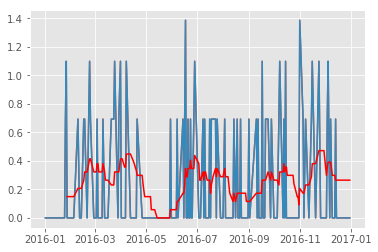

time: 160 ms


In [181]:
ts_log = np.log(chem_burns_home_ts)
plt.plot(ts_log)

moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [182]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

2016-01-01         NaN
2016-01-04         NaN
2016-01-05         NaN
2016-01-10         NaN
2016-01-13         NaN
2016-01-17         NaN
2016-01-18         NaN
2016-01-21         NaN
2016-01-24         NaN
2016-01-25         NaN
2016-01-26         NaN
2016-01-27   -0.149313
Name: Trmt_date, dtype: float64

time: 17.4 ms


/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


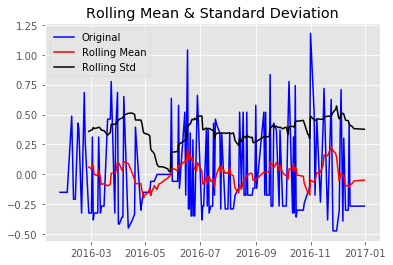

Results of Dickey-Fuller Test:
Test Statistic                -1.408643e+01
p-value                        2.770202e-26
#Lags Used                     0.000000e+00
Number of Observations Used    1.800000e+02
Critical Value (1%)           -3.467211e+00
Critical Value (5%)           -2.877735e+00
Critical Value (10%)          -2.575403e+00
dtype: float64
time: 177 ms


In [183]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


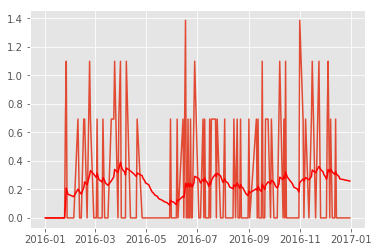

time: 153 ms


In [184]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


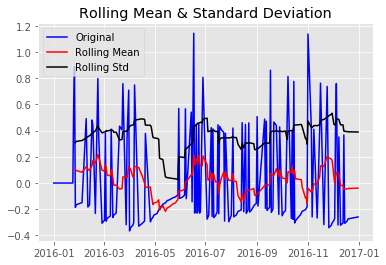

Results of Dickey-Fuller Test:
Test Statistic                -1.443732e+01
p-value                        7.458344e-27
#Lags Used                     0.000000e+00
Number of Observations Used    1.910000e+02
Critical Value (1%)           -3.465059e+00
Critical Value (5%)           -2.876794e+00
Critical Value (10%)          -2.574901e+00
dtype: float64
time: 179 ms


In [185]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)


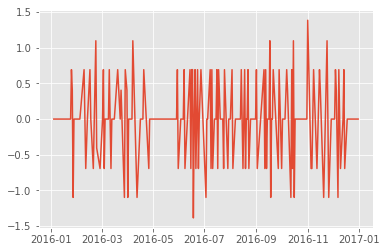

time: 138 ms


In [186]:
#Differencing for seasonality 
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


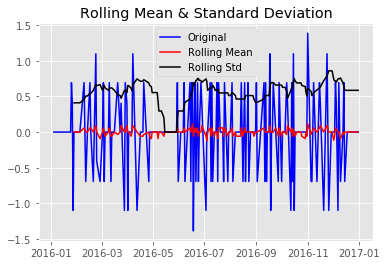

Results of Dickey-Fuller Test:
Test Statistic                -7.606602e+00
p-value                        2.313401e-11
#Lags Used                     9.000000e+00
Number of Observations Used    1.810000e+02
Critical Value (1%)           -3.467005e+00
Critical Value (5%)           -2.877644e+00
Critical Value (10%)          -2.575355e+00
dtype: float64
time: 163 ms


In [190]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [191]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

time: 823 µs


In [192]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

time: 17.1 ms


An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

Text(0.5,1,'Autocorrelation Function')

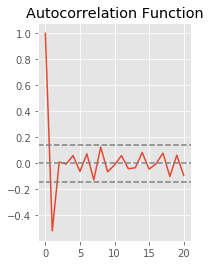

time: 126 ms


In [193]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

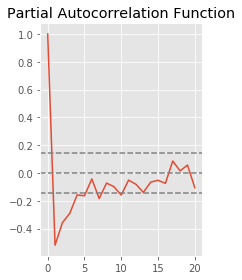

time: 142 ms


In [195]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# some useful links:
- [sas functions done in python](https://pandas.pydata.org/pandas-docs/stable/comparison_with_sas.html)
- [decision trees](http://scikit-learn.org/stable/modules/tree.html)
- [time series in python](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)